In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from preprocess import get_results

GENERATE_PNGS = False
pd.options.display.float_format = '{:.1f}'.format

## Preprocessing

### LibTorch: native and imported models

In [2]:
root = '../results_5'
training, evaluation = get_results(root)

/tmp/ipykernel_17795/2298702824.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=5)


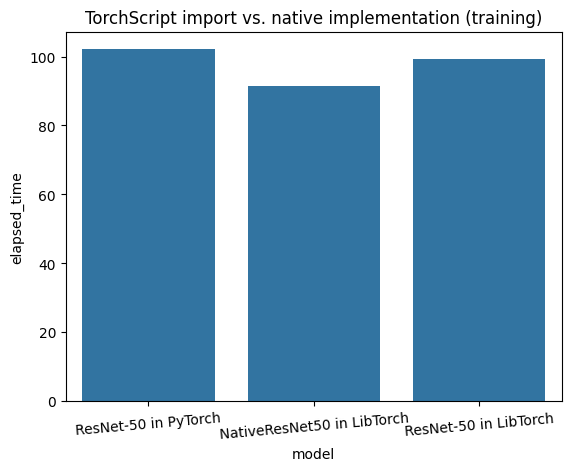

In [3]:
fig, ax = plt.subplots(1,1)

resnet = training[(training.model_name == 'ResNet-50') | (training.model_name == 'NativeResNet50')]
resnet = resnet[resnet.framework != 'TensorFlow']
resnet = resnet[resnet.epoch == 5].drop(columns=['epoch'])
resnet['model'] = resnet.pop('model_name') + ' in ' + resnet.pop('framework')

sns.barplot(data=resnet, x='model', y='elapsed_time', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=5)
ax.set_title('TorchScript import vs. native implementation (training)')

if GENERATE_PNGS:
	fig.savefig('./plots/libtorch_native_vs_imported_train.png')

/tmp/ipykernel_17795/4037812491.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=5)


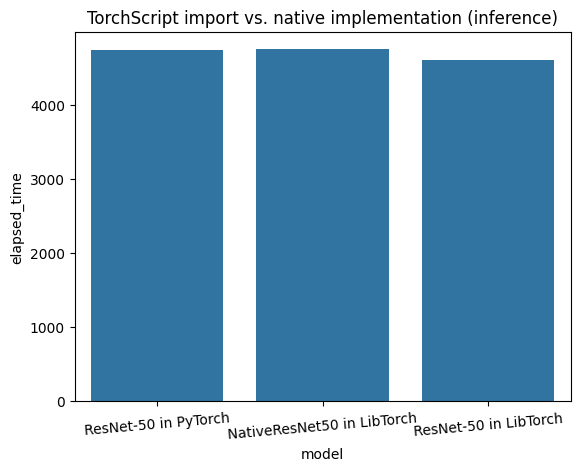

In [4]:
fig, ax = plt.subplots(1,1)

resnet = evaluation[(evaluation.model_name == 'ResNet-50') | (evaluation.model_name == 'NativeResNet50')]
resnet = resnet[resnet.framework != 'TensorFlow']
resnet['model'] = resnet.pop('model_name') + ' in ' + resnet.pop('framework')

sns.barplot(data=resnet, x='model', y='elapsed_time', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=5)
ax.set_title('TorchScript import vs. native implementation (inference)')

if GENERATE_PNGS:
	fig.savefig('./plots/libtorch_native_vs_imported_infer.png')

### Classification: LibTorch vs PyTorch
* dlaczego libtorch nie jest duzo szybszy od pytorcha? dla szkolenia jeszcze rozumiem, ale dla inferencji? przeciez libtorcha wykorzystuje sie wlasnie gdzie potrzeba jest low latency  
* dlaczego scvnet w pytorchu ssie tak bardzo? juz nawet nie w porownaniu z tf tylko nawet z libtorchem, a to przeciez ta sama architektura na tym samym silniku obliczeniowym

/tmp/ipykernel_17795/2474899950.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=17)


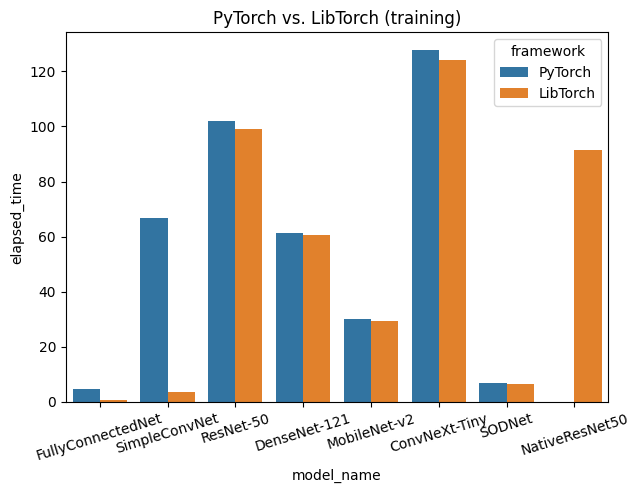

In [19]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(7, 4.8)

clfs = training[(training.framework == 'PyTorch') | (training.framework == 'LibTorch')] 
clfs = clfs[clfs.model_name != 'NativeResNet-50']
clfs = clfs[clfs.epoch == 5].drop(columns=['epoch'])
clfs = clfs[clfs.model_name != 'DCGAN']
sns.barplot(data=clfs, x='model_name', y='elapsed_time', hue='framework', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=17)
ax.set_title('PyTorch vs. LibTorch (training)')

if GENERATE_PNGS:
	fig.savefig('./plots/libtorch_vs_pytorch_clfs_train.png')

/tmp/ipykernel_17795/3535423304.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=10)


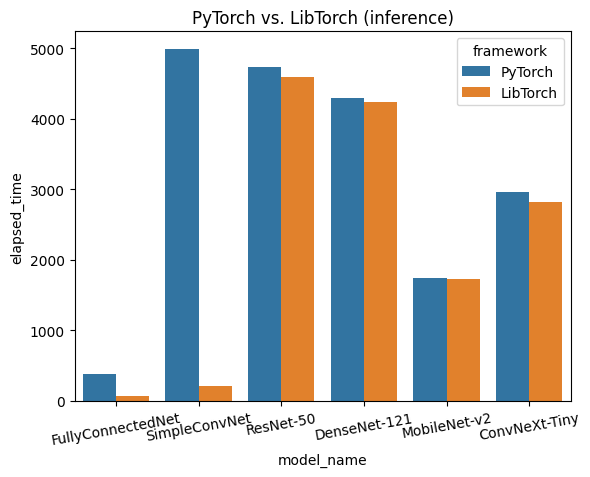

In [6]:
fig, ax = plt.subplots(1,1)

clfs = evaluation[(evaluation.framework == 'PyTorch') | (evaluation.framework == 'LibTorch')]
clfs = clfs[clfs.model_name != 'NativeResNet50']
clfs = clfs[clfs.model_name != 'DCGAN']
clfs = clfs[clfs.model_name != 'SODNet']
sns.barplot(data=clfs, x='model_name', y='elapsed_time', hue='framework', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=10)
ax.set_title('PyTorch vs. LibTorch (inference)')

if GENERATE_PNGS:
	fig.savefig('./plots/libtorch_vs_pytorch_clfs_infer.png')

### Classification: Torch vs. TensorFlow

/tmp/ipykernel_17795/3573647805.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=17)


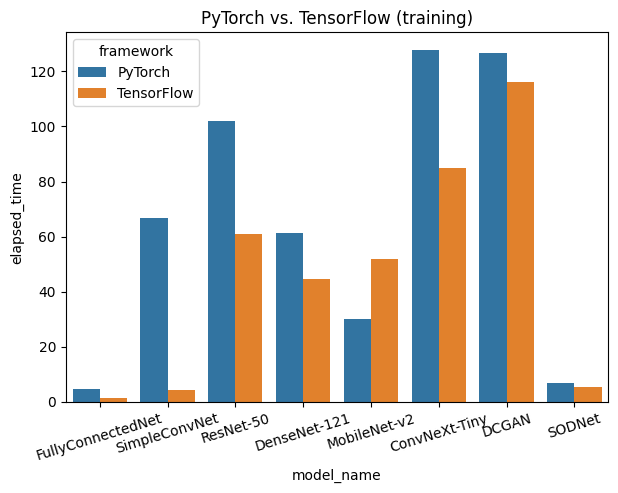

In [7]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(7, 4.8)

clfs = training[training.framework != 'Matlab']
clfs = clfs[clfs.framework != 'cuDNN']
clfs = clfs[clfs.framework != 'LibTorch']
clfs = clfs[clfs.model_name != 'NativeResNet-50']
clfs = clfs[clfs.epoch == 5].drop(columns=['epoch'])
# clfs = clfs[clfs.model_name != 'DCGAN']
sns.barplot(data=clfs, x='model_name', y='elapsed_time', hue='framework', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=17)
ax.set_title('PyTorch vs. TensorFlow (training)')

if GENERATE_PNGS:
	fig.savefig('./plots/torch_vs_tensorflow_clfs_train.png')

/tmp/ipykernel_17795/854734267.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=17)


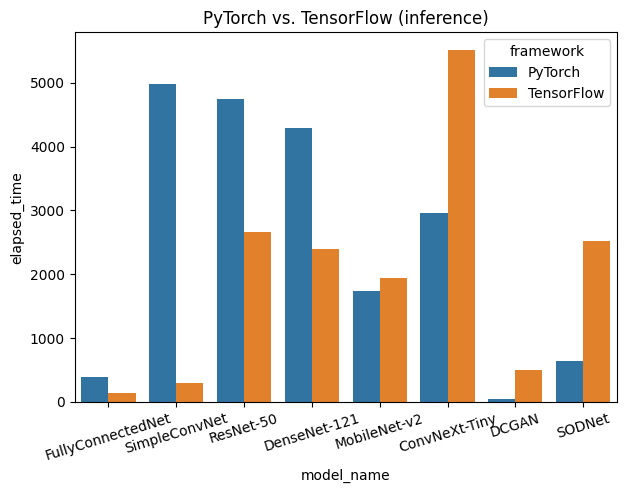

In [8]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(7, 4.8)

clfs = evaluation[evaluation.framework != 'Matlab']
clfs = clfs[clfs.framework != 'cuDNN']
clfs = clfs[clfs.framework != 'LibTorch']
clfs = clfs[clfs.model_name != 'NativeResNet-50']
# clfs = clfs[clfs.model_name != 'DCGAN']
sns.barplot(data=clfs, x='model_name', y='elapsed_time', hue='framework', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=17)
ax.set_title('PyTorch vs. TensorFlow (inference)')

if GENERATE_PNGS:
	fig.savefig('./plots/torch_vs_tensorflow_clfs_infer.png')

### LibTorch vs cuDNN: Is it worth the hassle?

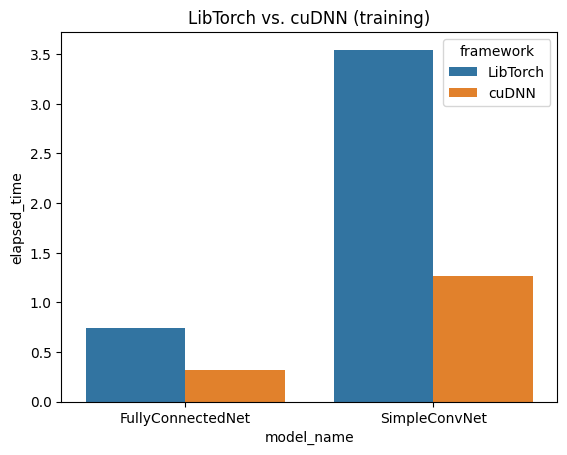

In [9]:
fig, ax = plt.subplots(1,1)

clfs = training[(training.framework == 'cuDNN') | (training.framework == 'LibTorch')]
clfs = clfs[(clfs.model_name == 'FullyConnectedNet') | (clfs.model_name == 'SimpleConvNet')]
clfs = clfs[clfs.epoch == 5].drop(columns=['epoch'])
sns.barplot(data=clfs, x='model_name', y='elapsed_time', hue='framework', ax=ax)

ax.set_title('LibTorch vs. cuDNN (training)')

if GENERATE_PNGS:
	fig.savefig('./plots/cudnn_train.png')

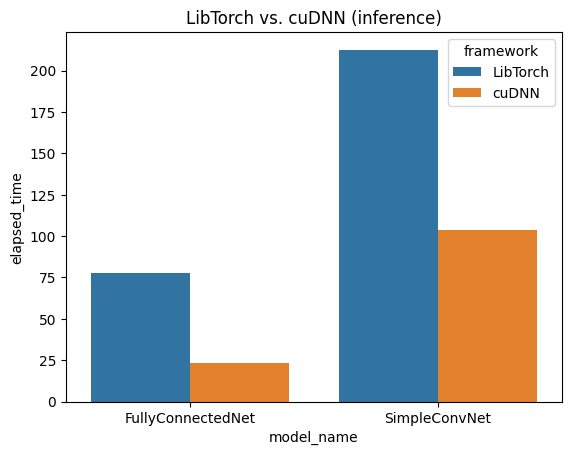

In [10]:
fig, ax = plt.subplots(1,1)

clfs = evaluation[(evaluation.framework == 'cuDNN') | (evaluation.framework == 'LibTorch')]
clfs = clfs[(clfs.model_name == 'FullyConnectedNet') | (clfs.model_name == 'SimpleConvNet')]
sns.barplot(data=clfs, x='model_name', y='elapsed_time', hue='framework', ax=ax)
ax.set_title('LibTorch vs. cuDNN (inference)')

if GENERATE_PNGS:
	fig.savefig('./plots/cudnn_infer.png')

### Matlab

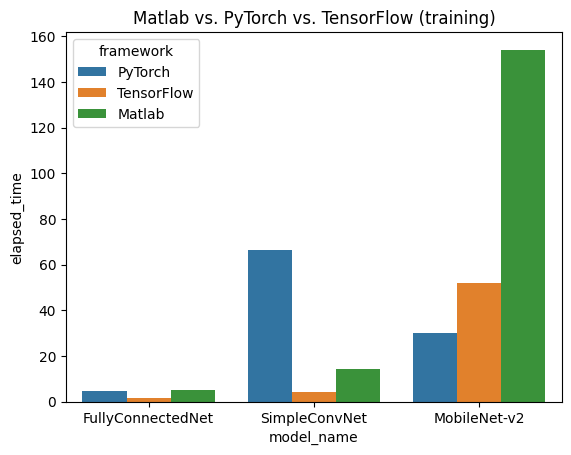

In [11]:
fig, ax = plt.subplots(1,1)

clfs = training[(training.framework != 'LibTorch') & (training.framework != 'cuDNN')]
clfs = clfs[clfs.epoch == 2].drop(columns=['epoch'])
clfs = clfs[(clfs.model_name == 'FullyConnectedNet') | (clfs.model_name == 'MobileNet-v2') | (clfs.model_name == 'SimpleConvNet')]
sns.barplot(data=clfs, x='model_name', y='elapsed_time', hue='framework', ax=ax)
ax.set_title('Matlab vs. PyTorch vs. TensorFlow (training)')

if GENERATE_PNGS:
	fig.savefig('./plots/matlab_train.png')

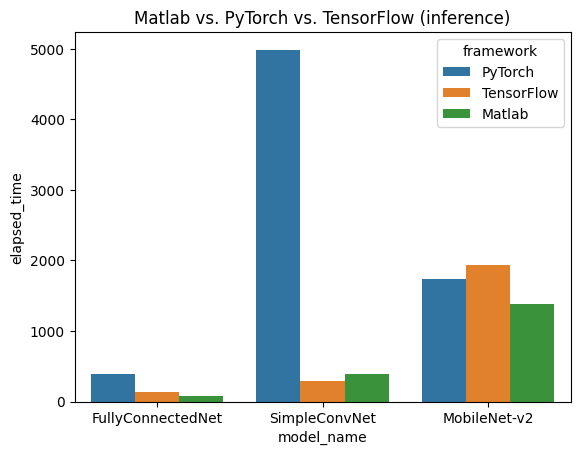

In [12]:
fig, ax = plt.subplots(1,1)

clfs = evaluation[(evaluation.framework != 'LibTorch') & (evaluation.framework != 'cuDNN')]
clfs = clfs[(clfs.model_name == 'FullyConnectedNet') | (clfs.model_name == 'MobileNet-v2') | (clfs.model_name == 'SimpleConvNet')]
sns.barplot(data=clfs, x='model_name', y='elapsed_time', hue='framework', ax=ax)
ax.set_title('Matlab vs. PyTorch vs. TensorFlow (inference)')

if GENERATE_PNGS:
	fig.savefig('./plots/matlab_infer.png')

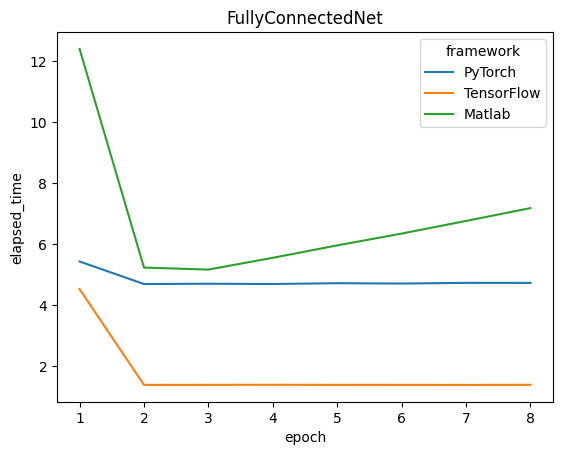

In [13]:
fig, ax = plt.subplots(1,1)

clfs = training[(training.framework != 'LibTorch') & (training.framework != 'cuDNN')]
sns.lineplot(data=clfs[clfs.model_name == 'FullyConnectedNet'], x='epoch', y='elapsed_time', hue='framework', ax=ax)
ax.set_title('FullyConnectedNet')

if GENERATE_PNGS:
	fig.savefig('./plots/matlab_increasing_train_time.png')

### DCGAN - generative adversial network

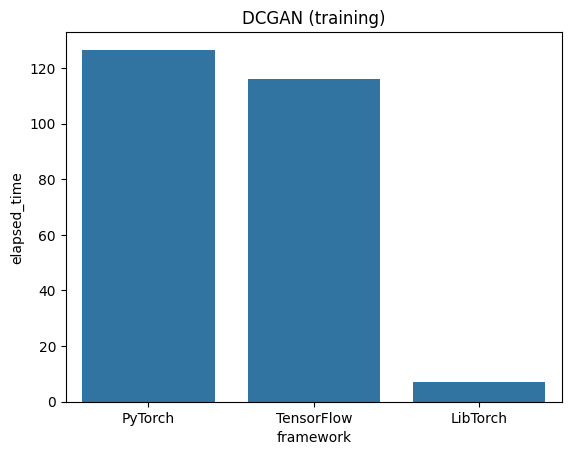

In [14]:
fig, ax = plt.subplots(1,1)

dcgan = training[training.model_name == 'DCGAN']
dcgan = dcgan[dcgan.epoch == 5].drop(columns=['epoch'])
sns.barplot(data=dcgan, x='framework', y='elapsed_time', ax=ax)
ax.set_title('DCGAN (training)')

if GENERATE_PNGS:
	fig.savefig('./plots/dcgan_comparison.png')

Text(0.5, 1.0, 'DCGAN (training + data loading)')

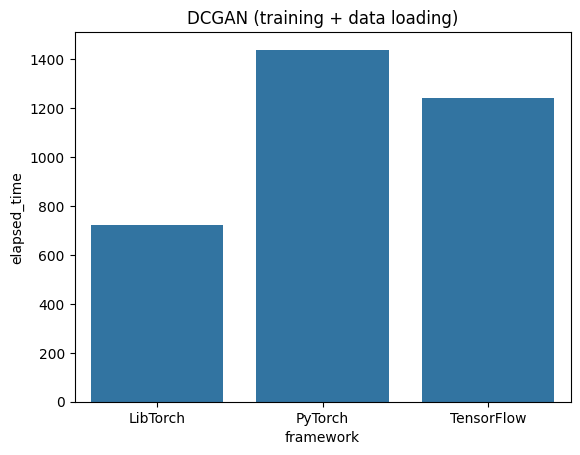

In [15]:
dcgan = training[training.model_name == 'DCGAN'].groupby('framework')['elapsed_time'].sum()
dcgan['LibTorch'] += training.loc[training.model_name == 'CELEBA', 'elapsed_time'].sum()
dcgan = dcgan.to_frame().reset_index()

fig, ax = plt.subplots(1,1)
sns.barplot(data=dcgan, x='framework', y='elapsed_time', ax=ax)
ax.set_title('DCGAN (training + data loading)')

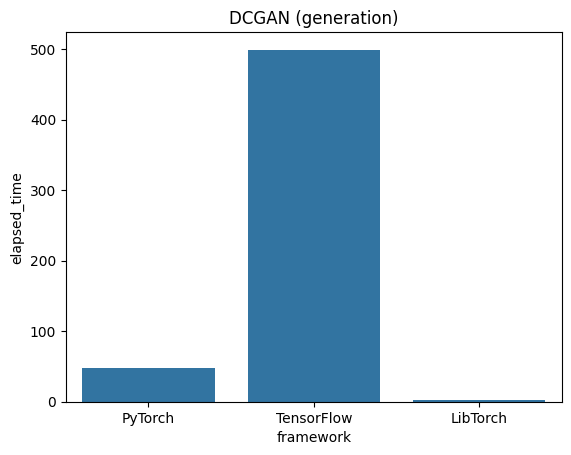

In [16]:
fig, ax = plt.subplots(1,1)

dcgan = evaluation[evaluation.model_name == 'DCGAN']
sns.barplot(data=dcgan, x='framework', y='elapsed_time', ax=ax)
ax.set_title('DCGAN (generation)')

if GENERATE_PNGS:
	fig.savefig('./plots/dcgan_gen_comp.png')

# SODNet - single object detection

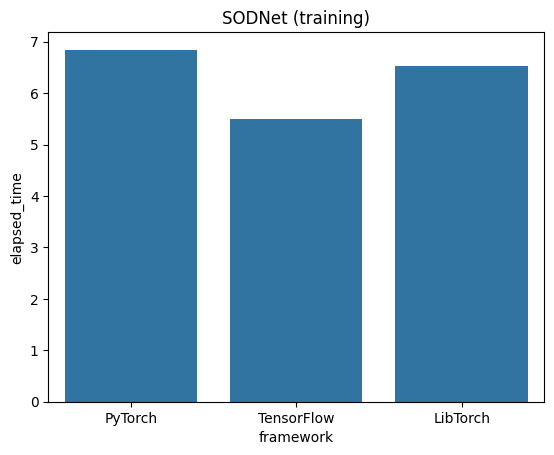

In [17]:
fig, ax = plt.subplots(1,1)

sodnet = training[training.model_name == 'SODNet']
sodnet = sodnet[sodnet.epoch == 5].drop(columns=['epoch'])
sns.barplot(data=sodnet, x='framework', y='elapsed_time', ax=ax)
ax.set_title('SODNet (training)')

if GENERATE_PNGS:
	fig.savefig('./plots/sodnet_comparison.png')

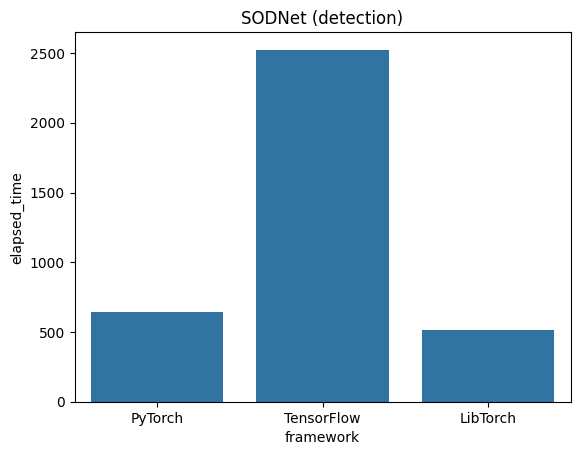

In [18]:
fig, ax = plt.subplots(1,1)

sodnet = evaluation[evaluation.model_name == 'SODNet']
sns.barplot(data=sodnet, x='framework', y='elapsed_time', ax=ax)
ax.set_title('SODNet (detection)')

if GENERATE_PNGS:
	fig.savefig('./plots/sodnet_detect_comp.png')